In [24]:
from Sector_Exposure import Rate_Exposures
import pandas as pd
import numpy as np
import fredapi as fa
from datetime import date
from Exposure_Report import Exposure
import Useful_Functions as u
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller, coint

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')


In [2]:


sector_df = pd.read_csv("sectors_and_rates.csv", index_col="Date")

sector_df.index = pd.to_datetime(sector_df.index)

sector_df['inflation'] = fred.get_series('T10YIE', observation_start = '2010-01-04', end = date.today())

exp = Exposure(sector_df, 252, 60, ['Real Yield', 'Yield Curve', 'inflation'], "SP-500")



In [19]:


# [['Real Yield', 'Yield Curve', 'inflation']]
sector_df.corr()


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,SP-500,Real Yield,Yield Curve,inflation
Materials,1.000000,0.975858,0.964645,0.934412,0.956263,0.966709,0.954096,0.910373,0.913720,0.936247,-0.257853,0.979404,-0.510309,-0.585204,0.179468
Industrials,0.975858,1.000000,0.973047,0.967720,0.978692,0.989176,0.935208,0.877884,0.956748,0.960273,-0.306718,0.983995,-0.453617,-0.697213,0.032539
Consumer Discretionary,0.964645,0.973047,1.000000,0.955267,0.980901,0.956362,0.981453,0.907936,0.946852,0.947945,-0.445212,0.994658,-0.557394,-0.675010,0.019663
Consumer Staples,0.934412,0.967720,0.955267,1.000000,0.983118,0.943818,0.907447,0.868160,0.976055,0.976143,-0.333070,0.962399,-0.506199,-0.756437,-0.104323
Health Care,0.956263,0.978692,0.980901,0.983118,1.000000,0.963557,0.947875,0.872023,0.969675,0.966090,-0.384304,0.986345,-0.489601,-0.728146,-0.059824
Financials,0.966709,0.989176,0.956362,0.943818,0.963557,1.000000,0.926907,0.850681,0.936199,0.945020,-0.287009,0.974248,-0.391724,-0.678379,0.075123
Technology,0.954096,0.935208,0.981453,0.907447,0.947875,0.926907,1.000000,0.904006,0.912494,0.911101,-0.482068,0.980860,-0.589962,-0.608544,0.106969
Telecomm,0.910373,0.877884,0.907936,0.868160,0.872023,0.850681,0.904006,1.000000,0.824194,0.890846,-0.302048,0.907512,-0.711823,-0.456710,0.174145
Utilities,0.913720,0.956748,0.946852,0.976055,0.969675,0.936199,0.912494,0.824194,1.000000,0.966767,-0.393144,0.956083,-0.492343,-0.806586,-0.121650
Real Estate,0.936247,0.960273,0.947945,0.976143,0.966090,0.945020,0.911101,0.890846,0.966767,1.000000,-0.287000,0.960237,-0.544191,-0.739932,-0.024089


(-3.2782582748666163,
 0.015878746765402366,
 1,
 2978,
 {'1%': -3.4325477654888106,
  '5%': -2.862511029642188,
  '10%': -2.5672869050538965},
 -18814.253944816966)

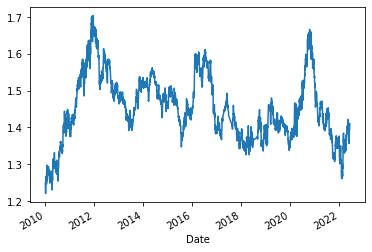

In [26]:

sc = StandardScaler()

#pd.DataFrame(sc.fit_transform(sector_df), index = sector_df.index, columns = sector_df.columns)[[u.ind, u.fin]].plot()


(sector_df[u.ind] / sector_df[u.fin]).plot()


coint(sector_df[u.ind],sector_df[u.fin])

adfuller((sector_df[u.ind] / sector_df[u.fin]))



In [52]:
import yfinance as yf

# VIS
test_df = yf.download(['XLI', 'XLF'], start = "2010-01-04", progress=False)['Close']


(0.025888009730988898, 0.004917822984707511)

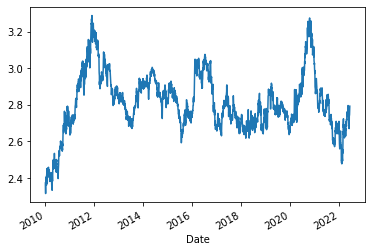

In [55]:

#cutoff = .7
# [400:int(len(test_df)*cutoff)]

lol = (test_df['XLI'] / test_df['XLF'])
#lol1 = (test_df['VIS'][int(len(test_df)*cutoff):] / test_df['XLF'][int(len(test_df)*cutoff):])

lol.plot()

coint(test_df['XLI'], test_df['XLF'])[1], adfuller(lol)[1]


In [83]:


sector_df['btc'] = yf.download(['BTC-USD'], start = "2020-01-04", end = "2022-01-04", progress=False)['Close']

cool = sector_df.dropna()


In [84]:


cool.corr().btc



Materials                 0.881015
Industrials               0.862823
Consumer Discretionary    0.846229
Consumer Staples          0.778690
Health Care               0.832913
Financials                0.878456
Technology                0.854758
Telecomm                  0.876833
Utilities                 0.555331
Real Estate               0.742367
Energy                    0.673289
SP-500                    0.876615
Real Yield               -0.493806
Yield Curve               0.862589
inflation                 0.896957
btc                       1.000000
Name: btc, dtype: float64

<AxesSubplot:xlabel='Date'>

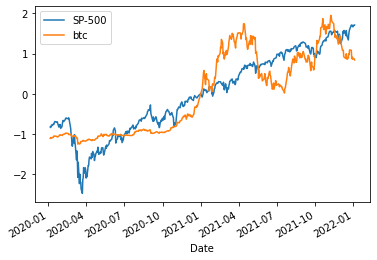

In [85]:


pd.DataFrame(sc.fit_transform(cool), index = cool.index, columns = cool.columns)[[u.sp500, 'btc']].plot()



<AxesSubplot:xlabel='Date'>

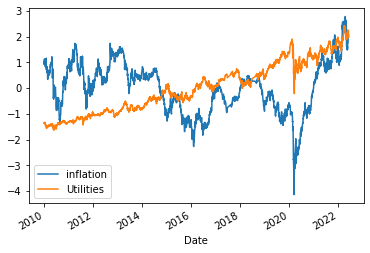

In [16]:




pd.DataFrame(sc.fit_transform(sector_df), index = sector_df.index, columns = sector_df.columns)[["inflation", "Utilities"]].plot()



In [9]:

inflation_score_current = exp.scores['inflation'][-1]

inflation_score_current


1.0

In [5]:


#exp.mean_returns['inflation']

#exp.forward_returns_daily

#exp.scores.keys()

#min(exp.scores['inflation'])


exp.mean_returns['Real Yield']



,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy
Materials,1.000000,0.516195,0.347091,-0.554577,-0.077969,-0.087790,-0.054695,-0.630445,-0.371750,-0.557388,0.559217
Industrials,0.516195,1.000000,-0.507949,0.285631,0.636817,0.694493,-0.818427,-0.912076,0.409837,0.147637,0.676507
Consumer Discretionary,0.347091,-0.507949,1.000000,-0.920811,-0.838727,-0.913419,0.881678,0.444742,-0.940107,-0.814439,-0.304599
Consumer Staples,-0.554577,0.285631,-0.920811,1.000000,0.772949,0.716064,-0.726937,-0.202340,0.922730,0.847863,0.067133
Health Care,-0.077969,0.636817,-0.838727,0.772949,1.000000,0.720947,-0.916117,-0.682518,0.899448,0.611705,0.519046
Financials,-0.087790,0.694493,-0.913419,0.716064,0.720947,1.000000,-0.904045,-0.582593,0.772729,0.653451,0.428968
Technology,-0.054695,-0.818427,0.881678,-0.726937,-0.916117,-0.904045,1.000000,0.773068,-0.842315,-0.601731,-0.595331
Telecomm,-0.630445,-0.912076,0.444742,-0.202340,-0.682518,-0.582593,0.773068,1.000000,-0.422378,-0.102452,-0.825390
Utilities,-0.371750,0.409837,-0.940107,0.922730,0.899448,0.772729,-0.842315,-0.422378,1.000000,0.854925,0.311628
Real Estate,-0.557388,0.147637,-0.814439,0.847863,0.611705,0.653451,-0.601731,-0.102452,0.854925,1.000000,0.019184


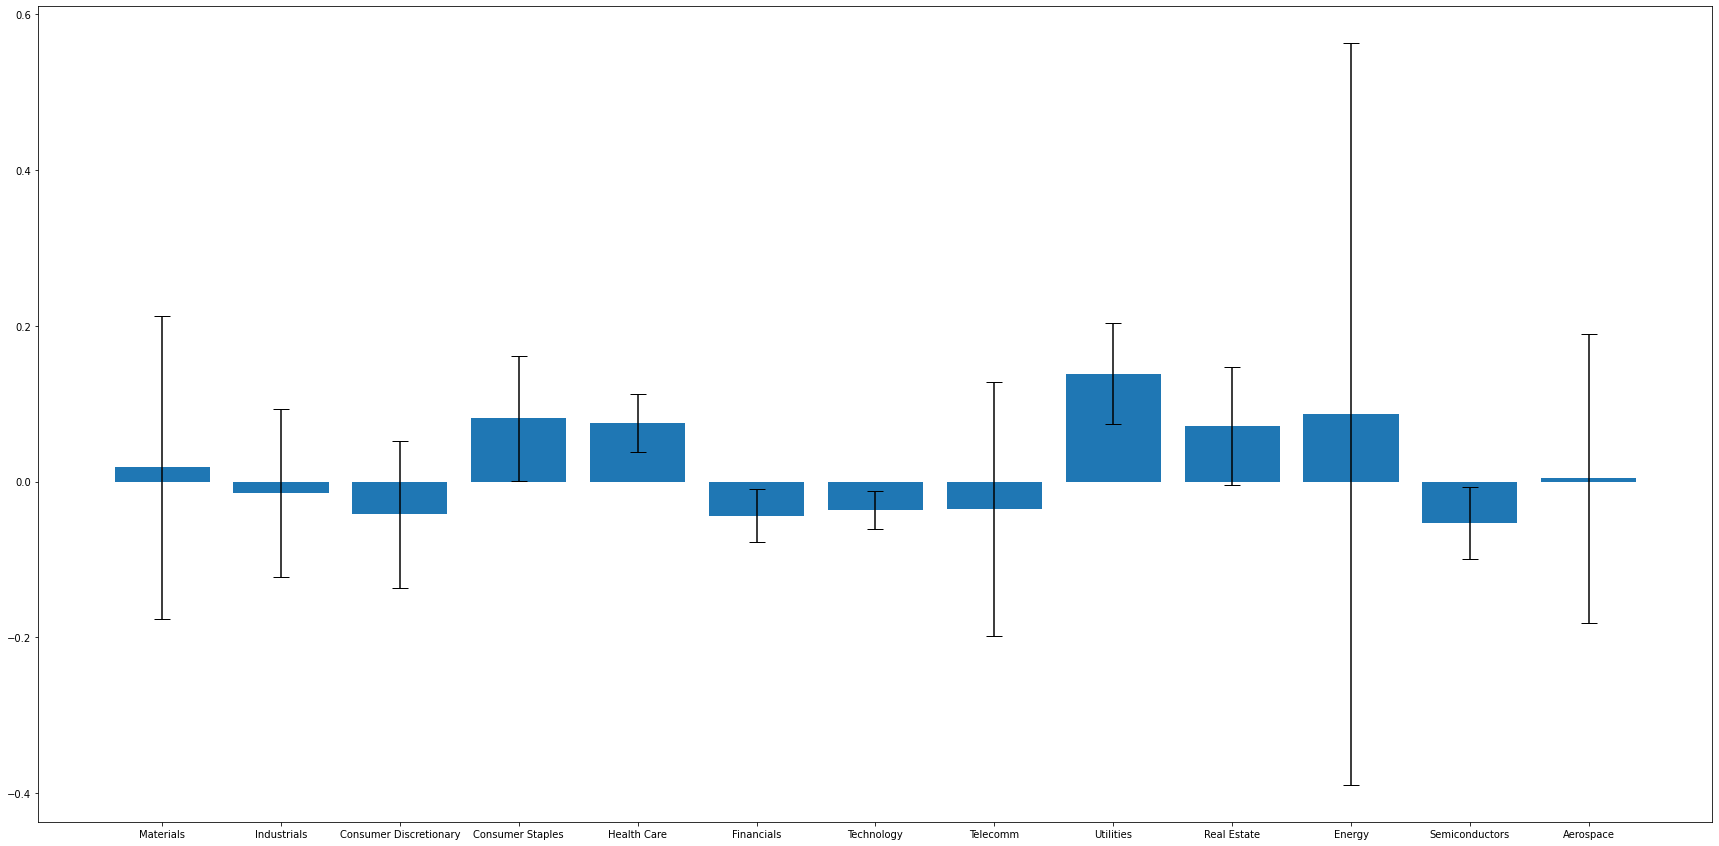

In [14]:



exp.total_return_all_combos[(2,-3,1)]

bruh = [(2,-4,0), (2,-4,2), (2,-3,0), (2,-3,1), (3,-3, 1), (3,-3, 0)]


u.barplot_1d(exp.mean_return_all_combos.loc[bruh].mean(), exp.mean_return_all_combos.loc[bruh].std()*3, size = (30,15))


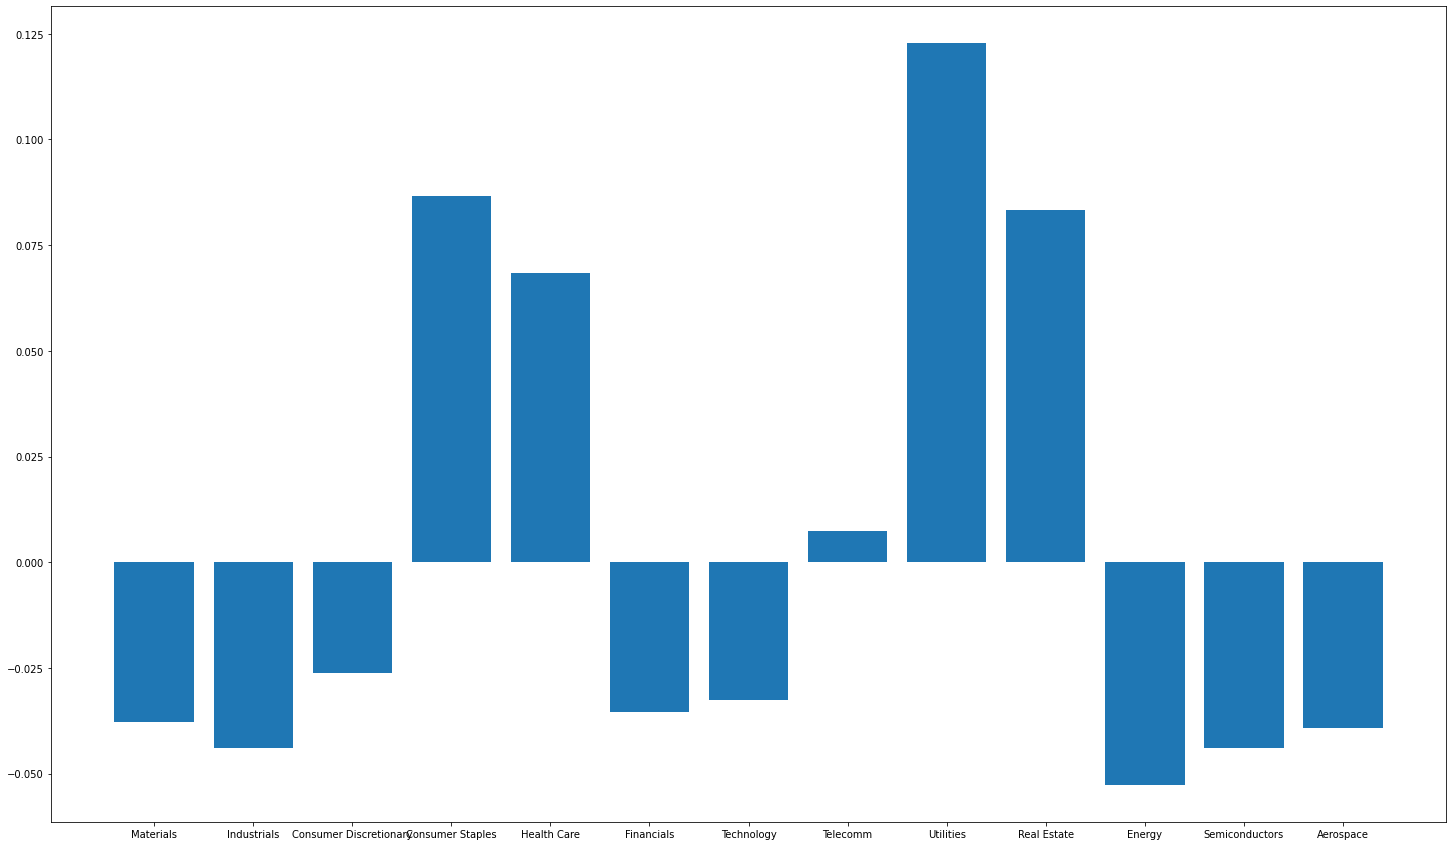

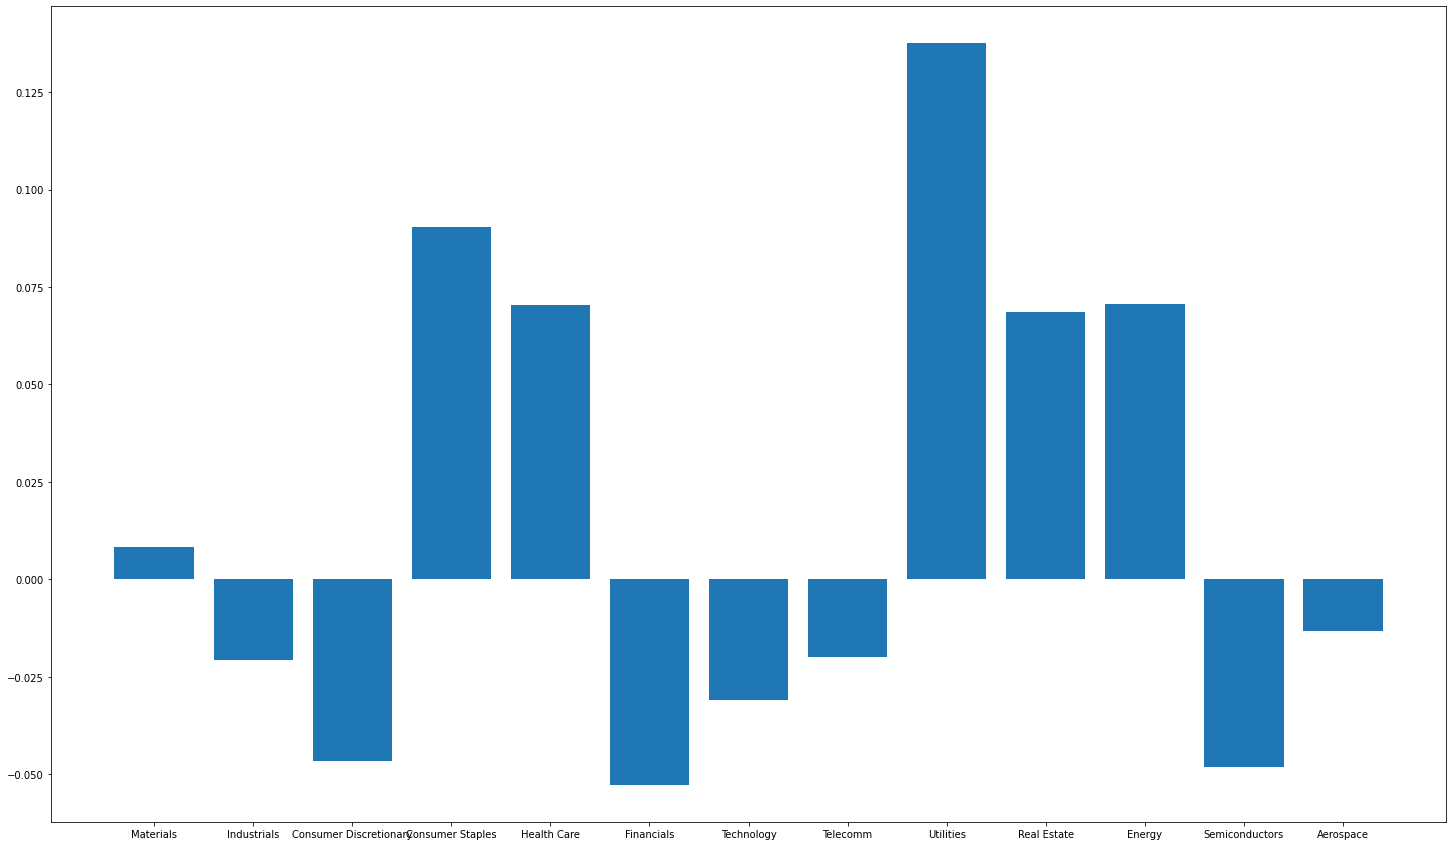

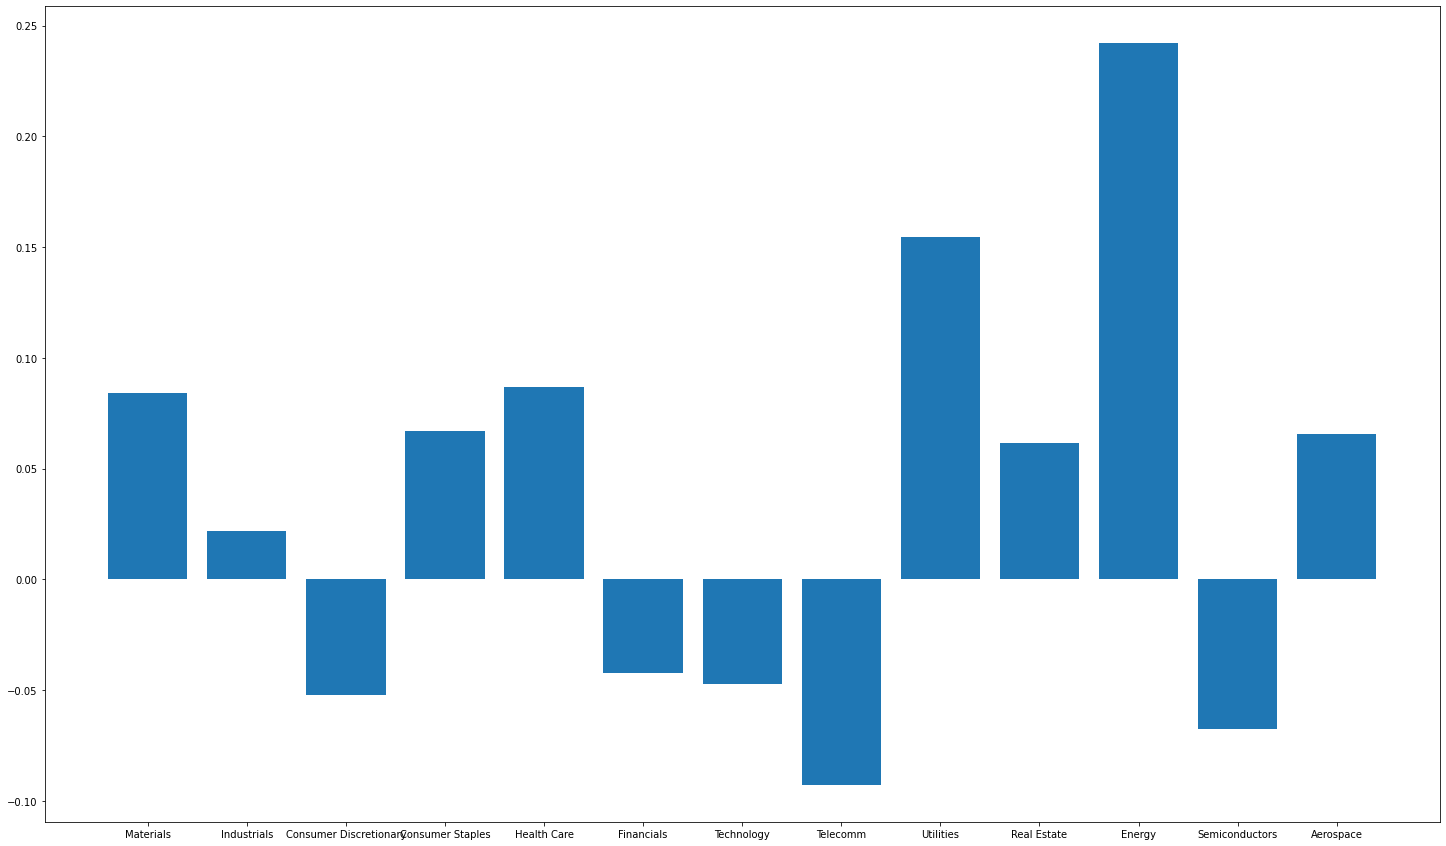

In [6]:


# [(2,-4,0), (2,-4,-1)]
similar_environment = exp.mean_return_all_combos.loc[[(2,-4,0), (2,-4,2)]].mean()

u.barplot_1d(exp.mean_return_all_combos.loc[[(2,-3,0), (2,-3,1)]].mean(), size = (25,15))


#exp.mean_return_all_combos.loc[[(2,-3,0), (2,-3,1)]]

u.barplot_1d(exp.mean_return_all_combos.loc[[(3,-3, 1), (3,-3, 0)]].mean(), size = (25,15))

u.barplot_1d(similar_environment, size = (25,15))


In [35]:

secs_for_sector_etf_webpage = ["technology", "healthcare", "real-estate", "materials", "financials", "utilities", "industrials", "consumer-discretionaries", "consumer-staples", "telecom"]

important_features_for_sector_etf_webpage =["Symbol", "ETF Name", "Industry", "Previous Closing Price", "Beta", "P/E Ratio", "YTD", "1 Month", "1 Year"]

sector_etfs = {}

for s in secs_for_sector_etf_webpage:
    print(s)
    url = f"https://etfdb.com/etfs/sector/{s}/"

    sector_etfs[s] = pd.read_html(url)[0].iloc[:-1,:][important_features_for_sector_etf_webpage]
    
    

technology
healthcare
real-estate
materials
financials
utilities
industrials
consumer-discretionaries
consumer-staples
telecom


In [37]:


sector_etfs['technology']



,Symbol,ETF Name,Industry,Previous Closing Price,Beta,P/E Ratio,YTD,1 Month,1 Year
0,QQQ,Invesco QQQ Trust,Broad Technology,$299.40,1.03,30.43,-24.65%,-3.19%,-10.69%
1,VGT,Vanguard Information Technology ETF,Broad Technology,$351.12,1.08,32.80,-23.24%,-3.21%,-6.12%
2,XLK,Technology Select Sector SPDR Fund,Broad Technology,$136.33,1.04,27.53,-21.45%,-3.02%,-1.98%
3,ARKK,ARK Innovation ETF,Broad Technology,$43.20,1.58,0.00,-54.33%,-5.33%,-61.40%
4,SMH,VanEck Semiconductor ETF,Semiconductors,$232.42,1.17,28.22,-24.73%,-0.11%,-5.54%
5,KWEB,KraneShares CSI China Internet ETF,Internet,$31.59,0.80,30.30,-13.43%,22.73%,-50.80%
6,SOXX,iShares Semiconductor ETF,Semiconductors,$403.64,1.17,32.73,-25.43%,-1.33%,-5.21%
7,IYW,iShares U.S. Technology ETF,Broad Technology,$86.20,1.06,39.34,-24.90%,-3.27%,-7.80%
8,FTEC,Fidelity MSCI Information Technology Index ETF,Broad Technology,$103.87,1.08,31.66,-23.15%,-3.21%,-5.98%
9,CIBR,First Trust NASDAQ Cybersecurity ETF,Internet Architecture,$42.57,1.02,28.05,-19.33%,-1.23%,-4.73%


In [61]:


exp.forward_returns_daily


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,Semiconductors,Aerospace,Real Yield_scores,Yield Curve_scores,inflation_scores
2010-01-04,-0.036383,0.032585,0.027520,0.032835,0.020674,0.002097,-0.031864,-0.073753,-0.036426,-0.001263,-0.010669,-0.030655,0.024000,NaN,NaN,NaN
2010-01-05,-0.033778,0.035630,0.025437,0.037650,0.027618,-0.012136,-0.027137,-0.081402,-0.023962,0.007372,-0.016827,-0.029283,0.030571,NaN,NaN,NaN
2010-01-06,-0.045261,0.036831,0.027417,0.038203,0.019663,-0.012037,-0.021512,-0.058641,-0.016731,0.012555,-0.026647,-0.025403,0.026106,NaN,NaN,NaN
2010-01-07,-0.040439,0.029301,0.022531,0.041806,0.020077,-0.016036,-0.015602,-0.048300,-0.012947,0.008120,-0.032143,-0.014800,0.033074,NaN,NaN,NaN
2010-01-08,-0.051278,0.016727,0.031605,0.055752,0.020717,-0.013437,-0.021548,-0.038363,-0.004965,0.023301,-0.036403,-0.038682,0.027353,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,0.034871,0.008617,-0.086504,-0.026201,-0.000527,-0.003005,0.010900,0.003728,0.043815,-0.063843,0.203835,0.067561,0.017022,5.0,0.0,4.0
2022-04-22,0.052525,0.006875,-0.086629,-0.040666,0.004949,-0.000194,0.008802,0.015533,0.035355,-0.080390,0.201190,0.062452,-0.000442,5.0,-0.0,3.0
2022-04-25,0.059207,0.016374,-0.100296,-0.044232,0.007429,0.001175,0.002988,0.002046,0.044766,-0.069554,0.275670,0.049778,0.024837,4.0,0.0,3.0
2022-04-26,0.036144,0.002748,-0.078237,-0.059120,0.001269,-0.007710,0.011929,0.016205,0.017822,-0.095472,0.259696,0.057043,0.002648,4.0,1.0,2.0


In [3]:
from scipy.stats.mstats import normaltest


rets = {}
mean_rets = {}

for rate in exp.scores:
    
    rets[rate] = exp.get_return_data(exp.forward_returns_daily, rate)
    mean_rets[rate] = pd.DataFrame({s : rets[rate][s].mean() for s in rets[rate]}).dropna().T
    
    is_normal = []
    
    for s in rets[rate]:
        
        try:
            is_normal.append(normaltest(rets[rate][s])[1] < .05)
        except:
            is_normal.append(np.array(['Insufficient Data' for i in range(len(rets[rate][s].columns))]))

is_normal_dist = pd.DataFrame(is_normal, columns = mean_rets["Real Yield"].columns, index = mean_rets[rate].index)



c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\mstats_basic.py:2597: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn(
c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\mstats_basic.py:2597: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn(
c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\Rhys Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\mstats_basic.py:2597: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn(


In [76]:
from itertools import permutations

#ok = [exp.scores[s].sort_values().unique() for s in exp.scores]

perm = permutations(exp.compare_against, 2)




In [78]:

list(perm)


[('Real Yield', 'Yield Curve'),
 ('Real Yield', 'inflation'),
 ('Yield Curve', 'Real Yield'),
 ('Yield Curve', 'inflation'),
 ('inflation', 'Real Yield'),
 ('inflation', 'Yield Curve')]

In [70]:

def get_combo_data(combo = None):
    
    assert isinstance(combo, list), "combo must me a list of comparable rates"
    
    cool = exp.forward_returns_daily.copy().dropna()
    
    cols = {rate : f"{rate}_scores" for rate in combo}
        
    past_combinations = pd.Series([tuple(i) for i in cool[list(cols.values()) ].values], index = cool.index)
    cool = cool.iloc[:,:-(len(exp.compare_against))]

    cool['combos'] = past_combinations
        
    
    uniques = past_combinations.unique()
    combo_rets = {}

    for un in uniques:
        
        combo_rets[un] = cool.iloc[:,:-1].loc[ cool.combos == un]

    
    return combo_rets
    


['Real Yield', 'Yield Curve', 'inflation']

In [71]:


total_combos = get_combo_data(combo = ['Real Yield', "Yield Curve"])



In [73]:



total_combos[(6,-3)]




,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,Semiconductors,Aerospace
2022-03-29,0.058055,0.026112,-0.102577,0.147351,0.062108,-0.008886,-0.042753,-0.045824,0.113517,-0.001931,0.164609,-0.079359,0.022707


Materials  Industrials  Consumer Discretionary  Consumer Staples  \
-8  1  -0.029449    -0.052537                0.087238         -0.074709   
-7 -6  -0.070786    -0.021072                0.024352          0.034876   
    1   0.013543    -0.054682                0.087348         -0.093425   
    2  -0.029617    -0.096662                0.054680          0.013602   
-6 -5  -0.055266    -0.023214                0.026144          0.028737   
...          ...          ...                     ...               ...   
 7  4  -0.028395     0.005331                0.025652         -0.006350   
    5   0.024517     0.008410                0.019287         -0.010524   
 8  4  -0.019489     0.005499                0.023221         -0.016044   
    5  -0.024948     0.008369                0.028956         -0.007060   
    6   0.007444     0.010935                0.021860         -0.013988   

       Health Care  Financials  Technology  Telecomm  Utilities  Real Estate  \
-8  1    -0.011901   -0.122932    0.070907  0.077914  -0.135917    -0.141183   
-7 -6     0.043999   -0.056146    0.027082  0.009848   0.079853    -0.015403   
    1    -0.016891   -0.083646    0.054585  0.057181  -0.107374    -0.112486   
    2     0.081881   -0.085558    0.040590  0.016161  -0.076461    -0.084465   
-6 -5     0.031333   -0.056501    0.026031  0.023153   0.086226    -0.011997   
...            ...         ...         ...       ...        ...          ...   
 7  4     0.005815    0.006029   -0.024471 -0.019295   0.009345    -0.032555   
    5     0.012671   -0.006116   -0.002501 -0.074767  -0.007690    -0.067235   
 8  4     0.015188    0.015284   -0.031769 -0.041935   0.011583    -0.010734   
    5     0.017975    0.012178   -0.027782 -0.041085   0.017928    -0.030760   
    6     0.005718   -0.001579   -0.004488 -0.065813  -0.010014    -0.068996   

         Energy  Semiconductors  Aerospace  
-8  1  0.053522        0.065085  -0.075319  
-7 -6 -0.059091        0.032053   0.025299  
    1  0.059714        0.033422  -0.069109  
    2 -0.160195        0.030623  -0.166987  
-6 -5 -0.048477        0.041824   0.012763  
...         ...             ...        ...  
 7  4 -0.009505        0.005684   0.049727  
    5 -0.005747       -0.034427   0.053064  
 8  4  0.007463       -0.007742   0.056025  
    5 -0.014191       -0.023976   0.053485  
    6 -0.007806       -0.035940   0.066683  

[144 rows x 13 columns]

In [24]:


is_normal_dist



,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,Semiconductors,Aerospace
-8,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data
-7,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data
-6,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data
-5,False,False,True,True,False,False,False,False,True,False,True,False,False
-4,True,True,True,True,False,False,False,False,True,True,True,True,True
-3,False,False,True,True,False,False,False,True,False,False,True,False,True
-2,True,True,True,False,False,True,False,True,False,True,True,True,True
-1,True,True,True,True,False,True,True,True,False,False,True,True,True
0,True,True,True,True,False,True,True,True,False,False,True,False,True
1,False,True,True,True,True,True,True,False,True,False,True,False,True
